In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("vag_dataset.csv")

In [3]:
#structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   knee_condition      2500 non-null   object 
 1   severity_level      1705 non-null   object 
 2   treatment_advised   2500 non-null   object 
 3   rms_amplitude       2500 non-null   float64
 4   peak_frequency      2500 non-null   float64
 5   spectral_entropy    2500 non-null   float64
 6   zero_crossing_rate  2500 non-null   float64
 7   mean_frequency      2500 non-null   float64
dtypes: float64(5), object(3)
memory usage: 156.4+ KB


In [4]:
#first few rows
df.head()

,knee_condition,severity_level,treatment_advised,rms_amplitude,peak_frequency,spectral_entropy,zero_crossing_rate,mean_frequency
0,normal,NaN,No Treatment,1.051421,20.0,-1799.219746,0.001,39.864485
1,normal,NaN,No Treatment,1.071817,20.0,-2010.827330,0.000,40.652874
2,osteoarthritis,Mild,Physiotherapy,1.098748,20.0,-2172.177329,0.000,39.961072
3,osteoarthritis,Severe,Surgery,1.063046,20.0,-1915.991388,0.000,39.860160
4,ligament_injury,Severe,Surgery,1.222318,20.0,-3331.987202,0.001,44.747680


In [5]:
#duplicate row check
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [6]:
df = df.drop_duplicates()


In [7]:
#check for missing value
df.isnull().sum()


knee_condition          0
severity_level        795
treatment_advised       0
rms_amplitude           0
peak_frequency          0
spectral_entropy        0
zero_crossing_rate      0
mean_frequency          0
dtype: int64

In [8]:
#basic status of numerical values
df.describe()


,rms_amplitude,peak_frequency,spectral_entropy,zero_crossing_rate,mean_frequency
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1.118481,20.384000,-2412.251714,-0.000018,41.949641
std,0.067338,4.785573,610.620891,0.000717,2.453461
min,1.003640,20.000000,-3915.364528,-0.001000,37.910850
25%,1.065577,20.000000,-3094.827471,-0.001000,40.038446
50%,1.086830,20.000000,-2112.249370,0.000000,40.729064
75%,1.195361,20.000000,-1930.338196,0.000000,44.743906
max,1.264899,80.000000,-1453.671345,0.001000,47.607962


In [9]:
#check min and max feature
for column in ['rms_amplitude', 'peak_frequency', 'spectral_entropy', 'zero_crossing_rate']:
    print(f"{column}: min = {df[column].min()}, max = {df[column].max()}")


rms_amplitude: min = 1.0036403934841054, max = 1.264898646730383
peak_frequency: min = 20.0, max = 80.0
spectral_entropy: min = -3915.3645278958447, max = -1453.6713448879295
zero_crossing_rate: min = -0.001, max = 0.001


In [10]:
#Check Unique Values in Categorical Column
print(df['knee_condition'].unique())
print(df['severity_level'].unique())
print(df['treatment_advised'].unique())


['normal' 'osteoarthritis' 'ligament_injury']
[nan 'Mild' 'Severe' 'Moderate']
['No Treatment' 'Physiotherapy' 'Surgery']


In [11]:
print(df['knee_condition'].value_counts())
print(df['severity_level'].value_counts())
print(df['treatment_advised'].value_counts())


knee_condition
ligament_injury    871
osteoarthritis     834
normal             795
Name: count, dtype: int64
severity_level
Severe      721
Moderate    713
Mild        271
Name: count, dtype: int64
treatment_advised
Surgery          1296
No Treatment      795
Physiotherapy     409
Name: count, dtype: int64


In [12]:
#Fill with "Unknown"
df['severity_level'] = df['severity_level'].fillna('Unknown')


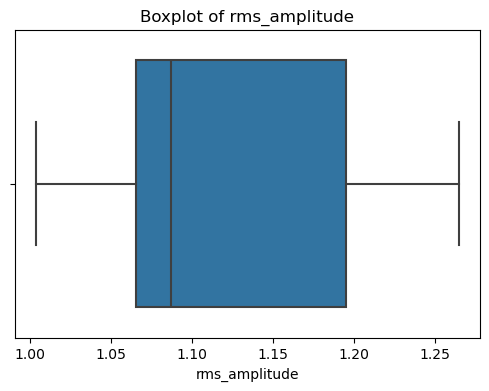

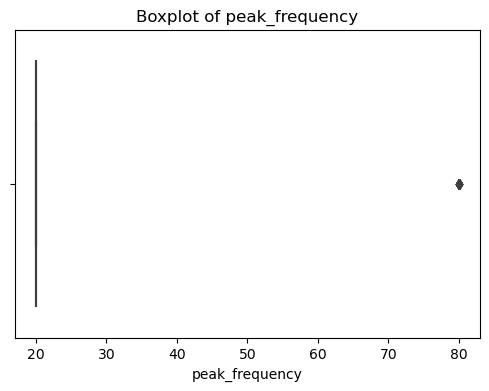

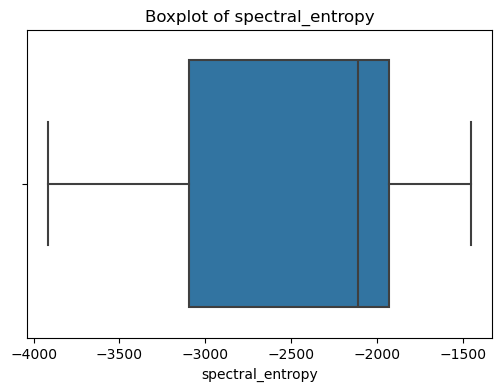

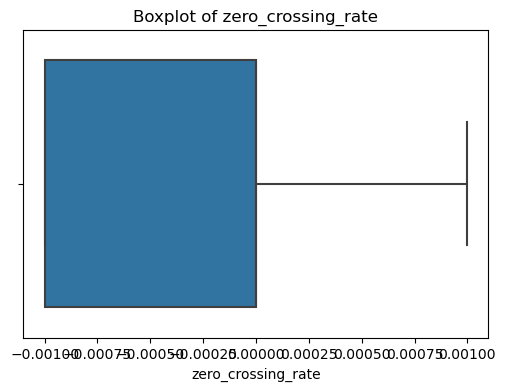

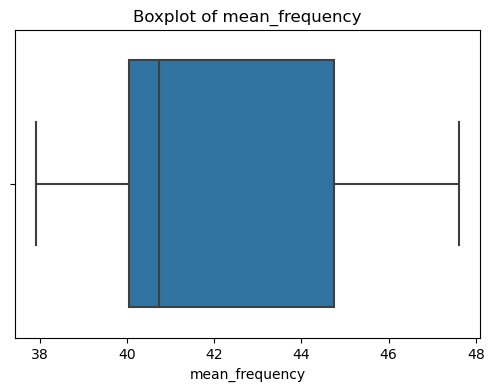

In [13]:
numeric_features = ['rms_amplitude', 'peak_frequency', 'spectral_entropy', 'zero_crossing_rate', 'mean_frequency']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [14]:
#using label encoder to convert categorical values to numerical values
from sklearn.preprocessing import LabelEncoder

le_knee_condition = LabelEncoder()
df['knee_condition_encoded'] = le_knee_condition.fit_transform(df['knee_condition'])

In [15]:
le_severity_level = LabelEncoder()
df['severity_level_encoded'] = le_severity_level.fit_transform(df['severity_level'])

In [16]:
le_treatment_advised = LabelEncoder()
df['treatment_advised_encoded'] = le_treatment_advised.fit_transform(df['treatment_advised'])

In [17]:
print(df['treatment_advised_encoded'])

0       0
1       0
2       1
3       2
4       2
       ..
2495    2
2496    0
2497    2
2498    0
2499    2
Name: treatment_advised_encoded, Length: 2500, dtype: int64


In [19]:
#using z score to remove outliers
# Z-scores for one column
z_scores = np.abs(stats.zscore(df["rms_amplitude"]))

# Boolean mask for outliers
outlier_mask = z_scores > 3

# Number of outliers
num_outliers = outlier_mask.sum()

print(f"Number of outliers in rms_amplitude: {num_outliers}")

# Optional: see which rows are outliers
df_outliers = df[outlier_mask]
print(df_outliers)



Number of outliers in rms_amplitude: 0
Empty DataFrame
Columns: [knee_condition, severity_level, treatment_advised, rms_amplitude, peak_frequency, spectral_entropy, zero_crossing_rate, mean_frequency, knee_condition_encoded, severity_level_encoded, treatment_advised_encoded]
Index: []


In [21]:
from scipy import stats
import numpy as np

numeric_features = ['rms_amplitude', 'peak_frequency', 'spectral_entropy', 'zero_crossing_rate', 'mean_frequency']

# Compute Z-scores for all numeric features → this will return a DataFrame!
z_scores = np.abs(stats.zscore(df[numeric_features]))

# Initialize dictionary to store outlier counts
outlier_counts = {}

# Loop through each column by name (no need to use i)
for col in numeric_features:
    num_outliers = (z_scores[col] > 3).sum()
    outlier_counts[col] = num_outliers

# Print outlier counts
print("Outliers per feature (Z > 3):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Outliers per feature (Z > 3):
rms_amplitude: 0
peak_frequency: 16
spectral_entropy: 0
zero_crossing_rate: 0
mean_frequency: 0


In [22]:
# Check missing values again
print(df.isnull().sum())

# Fill missing in 'severity_level' with mode
mode_value = df['severity_level'].mode()[0]
df['severity_level'].fillna(mode_value, inplace=True)

# Confirm no missing now
print(df.isnull().sum())


knee_condition               0
severity_level               0
treatment_advised            0
rms_amplitude                0
peak_frequency               0
spectral_entropy             0
zero_crossing_rate           0
mean_frequency               0
knee_condition_encoded       0
severity_level_encoded       0
treatment_advised_encoded    0
dtype: int64
knee_condition               0
severity_level               0
treatment_advised            0
rms_amplitude                0
peak_frequency               0
spectral_entropy             0
zero_crossing_rate           0
mean_frequency               0
knee_condition_encoded       0
severity_level_encoded       0
treatment_advised_encoded    0
dtype: int64


In [23]:
#performing scaling so values lie in the same range
from sklearn.preprocessing import StandardScaler

# Define your numerical features
numeric_features = ['rms_amplitude', 'peak_frequency', 'spectral_entropy', 'zero_crossing_rate', 'mean_frequency']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your numeric features and transform them
df[numeric_features] = scaler.fit_transform(df[numeric_features])
#check scaled values
df[numeric_features].describe()


,rms_amplitude,peak_frequency,spectral_entropy,zero_crossing_rate,mean_frequency
count,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03
mean,-1.215028e-15,-4.902745e-17,7.815970e-17,5.684342e-18,2.506795e-15
std,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00
min,-1.705760e+00,-8.025724e-02,-2.462106e+00,-1.369080e+00,-1.646490e+00
25%,-7.857923e-01,-8.025724e-02,-1.118062e+00,-1.369080e+00,-7.791348e-01
50%,-4.701223e-01,-8.025724e-02,4.914053e-01,2.509516e-02,-4.975913e-01
75%,1.141926e+00,-8.025724e-02,7.893767e-01,2.509516e-02,1.139135e+00
max,2.174795e+00,1.245994e+01,1.570159e+00,1.419271e+00,2.306722e+00


In [30]:
# Inputs: sensor features
X = df[numeric_features]

# Outputs: 3 targets
Y = df[['knee_condition_encoded', 'severity_level_encoded', 'treatment_advised_encoded']]


In [31]:
#split data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# Wrap KNN for multi-output
knn = KNeighborsClassifier(n_neighbors=5)
multi_knn = MultiOutputClassifier(knn)

# Train
multi_knn.fit(X_train, Y_train)

# Predict
Y_pred = multi_knn.predict(X_test)

# Evaluate accuracy per output
for i, col in enumerate(Y.columns):
    acc = accuracy_score(Y_test.iloc[:, i], Y_pred[:, i])
    print(f"Accuracy for {col}: {acc:.2f}")


Accuracy for knee_condition_encoded: 0.87
Accuracy for severity_level_encoded: 0.52
Accuracy for treatment_advised_encoded: 0.74


In [33]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

# Wrap SVM
svm = SVC(kernel='linear', random_state=42)
multi_svm = MultiOutputClassifier(svm)

# Train
multi_svm.fit(X_train, Y_train)

# Predict
Y_pred_svm = multi_svm.predict(X_test)

# Evaluate accuracy per output
for i, col in enumerate(Y.columns):
    acc = accuracy_score(Y_test.iloc[:, i], Y_pred_svm[:, i])
    print(f"Accuracy for {col}: {acc:.2f}")


Accuracy for knee_condition_encoded: 0.88
Accuracy for severity_level_encoded: 0.54
Accuracy for treatment_advised_encoded: 0.77


In [27]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       161
           2       1.00      1.00      1.00       156

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



knee_condition is relatively easy to predict from the sensor features → high accuracy.

severity_level is harder → likely because it may depend on other factors not captured by the sensors.

treatment_advised is moderately predictable → this makes sense since doctors may base it partly on sensor features and partly on clinical judgement.



Random Forest - Accuracy for knee_condition_encoded: 0.88
Random Forest - Accuracy for severity_level_encoded: 0.53
Random Forest - Accuracy for treatment_advised_encoded: 0.76

Feature importances for predicting 'knee_condition_encoded':
rms_amplitude: 0.356
mean_frequency: 0.330
spectral_entropy: 0.300
zero_crossing_rate: 0.013
peak_frequency: 0.001


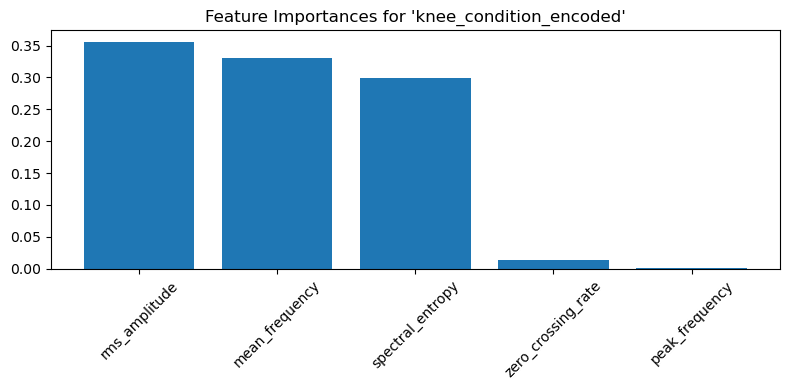


Feature importances for predicting 'severity_level_encoded':
rms_amplitude: 0.331
spectral_entropy: 0.319
mean_frequency: 0.311
zero_crossing_rate: 0.037
peak_frequency: 0.002


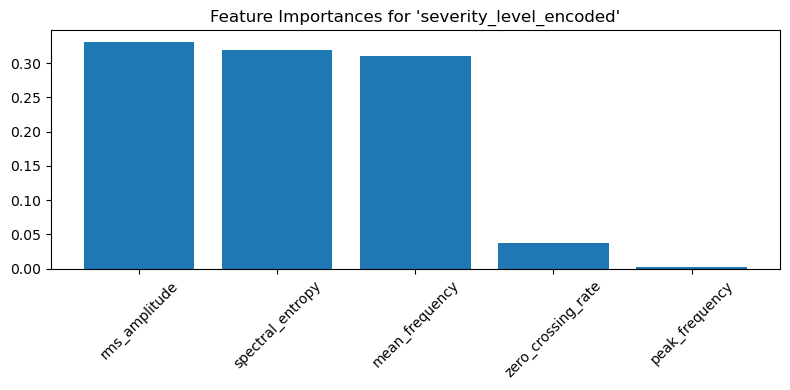


Feature importances for predicting 'treatment_advised_encoded':
rms_amplitude: 0.369
spectral_entropy: 0.313
mean_frequency: 0.291
zero_crossing_rate: 0.027
peak_frequency: 0.000


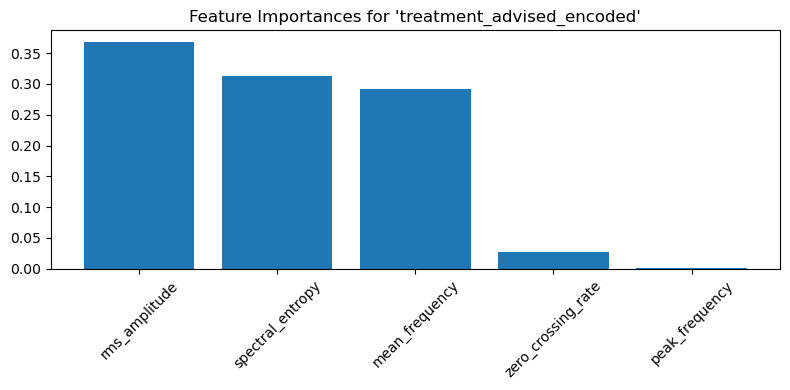

In [34]:
#identifying future importance using random forest 
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define inputs and outputs
X = df[numeric_features]
Y = df[['knee_condition_encoded', 'severity_level_encoded', 'treatment_advised_encoded']]

# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_rf = MultiOutputClassifier(rf)

# Train
multi_rf.fit(X_train, Y_train)

# Predict
Y_pred_rf = multi_rf.predict(X_test)

# Evaluate accuracy per output
for i, col in enumerate(Y.columns):
    acc = accuracy_score(Y_test.iloc[:, i], Y_pred_rf[:, i])
    print(f"Random Forest - Accuracy for {col}: {acc:.2f}")

# ---- Feature Importance ----
# For each output, print feature importance
for i, estimator in enumerate(multi_rf.estimators_):
    importances = estimator.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = X.columns

    print(f"\nFeature importances for predicting '{Y.columns[i]}':")
    for f in range(len(feature_names)):
        print(f"{feature_names[indices[f]]}: {importances[indices[f]]:.3f}")

    # Optional: Plot feature importances
    plt.figure(figsize=(8,4))
    plt.title(f"Feature Importances for '{Y.columns[i]}'")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), feature_names[indices], rotation=45)
    plt.tight_layout()
    plt.show()


In [35]:
#tuning the knn model
#We tuned KNN, SVM, and RandomForest models via 5-fold cross-validation using GridSearchCV. The mean accuracy and standard deviation are reported to ensure robustness of results
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# -------- 1️⃣ Hyperparameter tuning for KNN --------

knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
multi_knn_grid = MultiOutputClassifier(knn_grid)

# Fit multi-output KNN grid
multi_knn_grid.fit(X_train, Y_train)

# Best params for each output:
print("Best KNN params per output:")
for i, estimator in enumerate(multi_knn_grid.estimators_):
    print(f"{Y.columns[i]}: {estimator.best_params_}")

# -------- 2️⃣ Hyperparameter tuning for SVM --------

svm = SVC()

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
multi_svm_grid = MultiOutputClassifier(svm_grid)

# Fit multi-output SVM grid
multi_svm_grid.fit(X_train, Y_train)

# Best params for each output:
print("\nBest SVM params per output:")
for i, estimator in enumerate(multi_svm_grid.estimators_):
    print(f"{Y.columns[i]}: {estimator.best_params_}")

# -------- 3️⃣ Optional: Hyperparameter tuning for RandomForest --------

rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
multi_rf_grid = MultiOutputClassifier(rf_grid)

# Fit multi-output RF grid
multi_rf_grid.fit(X_train, Y_train)

# Best params for each output:
print("\nBest RandomForest params per output:")
for i, estimator in enumerate(multi_rf_grid.estimators_):
    print(f"{Y.columns[i]}: {estimator.best_params_}")

# -------- 4️⃣ Cross-validation scores --------

# Example with KNN tuned:

print("\nCross-validation scores (5-fold):")

for i, col in enumerate(Y.columns):
    knn_cv_score = cross_val_score(KNeighborsClassifier(n_neighbors=multi_knn_grid.estimators_[i].best_params_['n_neighbors']),
                                   X, Y.iloc[:, i], cv=5, scoring='accuracy')
    print(f"KNN - {col}: Mean acc = {knn_cv_score.mean():.2f}, Std = {knn_cv_score.std():.2f}")

# You can do similar for SVM and RF:
# Cross-validation for SVM:
for i, col in enumerate(Y.columns):
    best_svm_params = multi_svm_grid.estimators_[i].best_params_
    svm_model = SVC(C=best_svm_params['C'], kernel=best_svm_params['kernel'])
    svm_cv_score = cross_val_score(svm_model, X, Y.iloc[:, i], cv=5, scoring='accuracy')
    print(f"SVM - {col}: Mean acc = {svm_cv_score.mean():.2f}, Std = {svm_cv_score.std():.2f}")

# Cross-validation for RandomForest:
for i, col in enumerate(Y.columns):
    best_rf_params = multi_rf_grid.estimators_[i].best_params_
    rf_model = RandomForestClassifier(n_estimators=best_rf_params['n_estimators'],
                                      max_depth=best_rf_params['max_depth'],
                                      random_state=42)
    rf_cv_score = cross_val_score(rf_model, X, Y.iloc[:, i], cv=5, scoring='accuracy')
    print(f"RandomForest - {col}: Mean acc = {rf_cv_score.mean():.2f}, Std = {rf_cv_score.std():.2f}")


Best KNN params per output:
knee_condition_encoded: {'n_neighbors': 11}
severity_level_encoded: {'n_neighbors': 11}
treatment_advised_encoded: {'n_neighbors': 11}

Best SVM params per output:
knee_condition_encoded: {'C': 10, 'kernel': 'linear'}
severity_level_encoded: {'C': 10, 'kernel': 'rbf'}
treatment_advised_encoded: {'C': 10, 'kernel': 'linear'}

Best RandomForest params per output:
knee_condition_encoded: {'max_depth': 10, 'n_estimators': 100}
severity_level_encoded: {'max_depth': 20, 'n_estimators': 200}
treatment_advised_encoded: {'max_depth': 10, 'n_estimators': 200}

Cross-validation scores (5-fold):
KNN - knee_condition_encoded: Mean acc = 0.86, Std = 0.01
KNN - severity_level_encoded: Mean acc = 0.54, Std = 0.03
KNN - treatment_advised_encoded: Mean acc = 0.72, Std = 0.02
SVM - knee_condition_encoded: Mean acc = 0.87, Std = 0.01
SVM - severity_level_encoded: Mean acc = 0.54, Std = 0.02
SVM - treatment_advised_encoded: Mean acc = 0.75, Std = 0.02
RandomForest - knee_conditi

KNN always prefers n_neighbors=11 → smooth decision boundary, less overfitting.

SVM is mixed → for severity_level, an rbf kernel is better → likely more complex boundary.

RandomForest → optimal depth varies → deeper tree (max_depth=20) helps for severity_level.

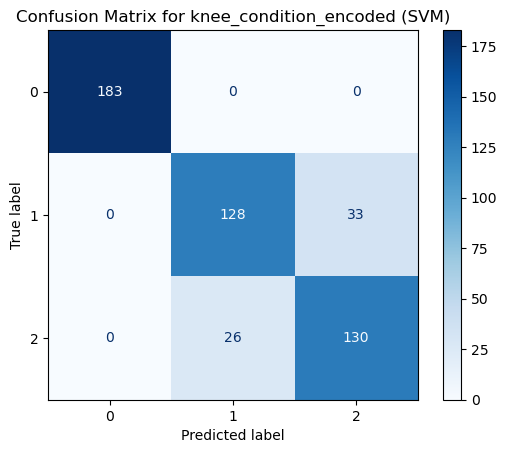

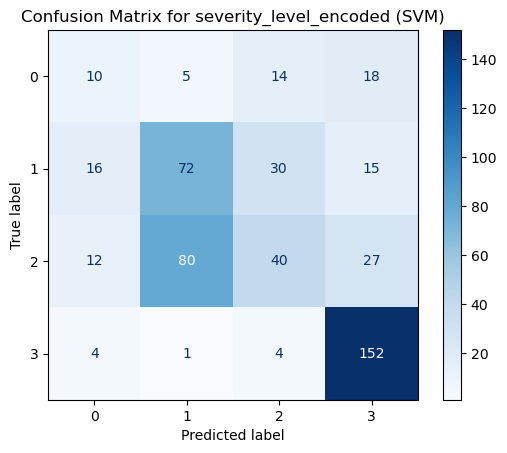

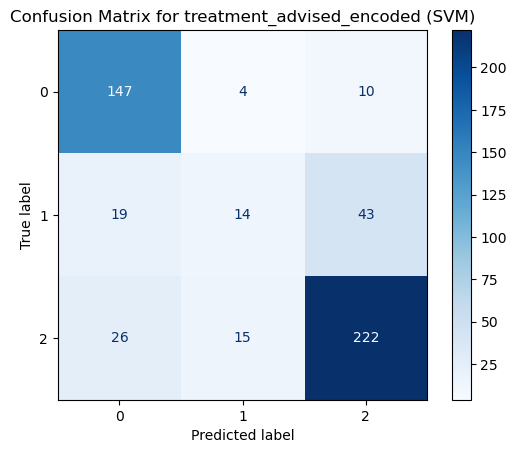

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For each output, plot Confusion Matrix for SVM (as an example)
# You can repeat for KNN and RF if you want.

# Predict with tuned SVM
Y_pred_svm = multi_svm_grid.predict(X_test)

# Plot Confusion Matrix for each output:
for i, col in enumerate(Y.columns):
    cm = confusion_matrix(Y_test.iloc[:, i], Y_pred_svm[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {col} (SVM)')
    plt.show()
